# Linear Models in Scikit vs Statsmodels

 **One must know the difference**

In [1]:
import lightgbm as lgb
import numpy as np

# Importing modules
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression

In [2]:
X, y = load_boston(return_X_y=True)
feature_names = load_boston().feature_names
X_pd = pd.DataFrame(X, columns=feature_names)

 **Here is a list of features that the data has along with their description**

 * VCRIM per capita crime rate by town

 * ZN proportion of residential land zoned for lots over 25,000 sq.ft.

 * INDUS proportion of non-retail business acres per town

 * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 * NOX nitric oxides concentration (parts per 10 million)

 * RM average number of rooms per dwelling

 * AGE proportion of owner-occupied units built prior to 1940

 * DIS weighted distances to five Boston employment centres

 * RAD index of accessibility to radial highways

 * TAX full-value property-tax rate per $10,000

 * PTRATIO pupil-teacher ratio by town

 * B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town

 * LSTAT % lower status of the population

 * MEDV Median value of owner-occupied homes in $1000’s

In [3]:
# statsmodels lr model (data at original scale)
X_pd_sm = sm.add_constant(X_pd)
sm_lr = sm.OLS(y, X_pd_sm)
sm_lr_res = sm_lr.fit()
sm_summary1 = sm_lr_res.summary()

/Users/shoaibkhanz/convergeML_projects/machine_learning_notebooks/ml_notebooks_env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [4]:
# scikit-learn lr model (data at original scale)
sk_lr = LinearRegression()
sk_lr.fit(X_pd, y)

# creating a pandas dataframe of coefficients
sk_coefs = pd.DataFrame(sk_lr.coef_, feature_names, columns=["coeficients"])

In [5]:
print("\n", "#" * 20, "Statsmodels Summary default output", "#" * 20)
print(sm_summary1)

print("\n", "#" * 20, "Scikit OLS coefficients output", "#" * 20)
print(sk_coefs)


 #################### Statsmodels Summary default output ####################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        14:43:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [6]:
(sk_coefs.values.ravel() * np.std(X_pd)).sort_values()

LSTAT     -3.743627
DIS       -3.104044
TAX       -2.076782
PTRATIO   -2.060607
NOX       -2.056718
CRIM      -0.928146
AGE        0.019466
INDUS      0.140900
CHAS       0.681740
B          0.849268
ZN         1.081569
RAD        2.662218
RM         2.674230
dtype: float64

In [7]:
np.std(X_pd)

CRIM         8.593041
ZN          23.299396
INDUS        6.853571
CHAS         0.253743
NOX          0.115763
RM           0.701923
AGE         28.121033
DIS          2.103628
RAD          8.698651
TAX        168.370495
PTRATIO      2.162805
B           91.204607
LSTAT        7.134002
dtype: float64

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
std = StandardScaler()
X_std = std.fit_transform(X_pd)
X_std_pd = pd.DataFrame(X_std, columns=feature_names)

In [10]:
# statsmodels lr model (data at original scale)
X_std_pd_sm = sm.add_constant(X_std_pd)
sm_lr_std = sm.OLS(y, X_std_pd_sm)
sm_lr_std_res = sm_lr_std.fit()
sm_summary2 = sm_lr_std_res.summary()

/Users/shoaibkhanz/convergeML_projects/machine_learning_notebooks/ml_notebooks_env/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
# scikit-learn lr model (data at original scale)
sk_std_lr = LinearRegression()
sk_std_lr.fit(X_std_pd, y)

# creating a pandas dataframe of coefficients
sk_std_coefs = pd.DataFrame(sk_std_lr.coef_, feature_names, columns=["coeficients"])

In [12]:
print("\n", "#" * 20, "Statsmodels Summary default output", "#" * 20)
print(sm_summary2)
print("\n", "#" * 20, "Scikit OLS coefficients output", "#" * 20)
print(sk_std_coefs)


 #################### Statsmodels Summary default output ####################
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 08 Sep 2021   Prob (F-statistic):          6.72e-135
Time:                        14:43:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [13]:
sk_std_coefs.sort_values(by="coeficients")

,coeficients
LSTAT,-3.743627
DIS,-3.104044
TAX,-2.076782
PTRATIO,-2.060607
NOX,-2.056718
CRIM,-0.928146
AGE,0.019466
INDUS,0.140900
CHAS,0.681740
B,0.849268


In [14]:
pd1 = pd.DataFrame(sm_summary2.tables[1])
# pd1.columns = pd1[0]
# pd1.drop(0,axis = 0,inplace=True)

In [15]:
sm_coefs = pd1[1]
sm_t_val = pd1[2]

In [16]:
sm_coefs.drop(0, axis=0, inplace=True)

# /sm_t_val

In [17]:
lgb_data = lgb.Dataset(X_pd, label=y)

In [18]:
params = {"learning_rate": 0.01, "verbose": -1}
lgb_model = lgb.train(params=params, train_set=lgb_data)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

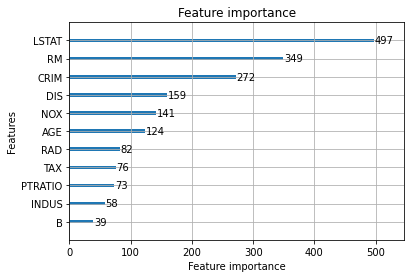

In [19]:
lgb.plot_importance(lgb_model)